<a href="https://colab.research.google.com/github/AkashSalmuthe/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Import All Required Libraries**

In [2]:
pip install livelossplot

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
%matplotlib inline


tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.layers.Dense, tf.keras.layers.Input, tf.keras.layers.Dropout,tf.keras.layers.Flatten, tf.keras.layers.Conv2D
tf.keras.layers.BatchNormalization, tf.keras.layers.Activation, tf.keras.layers.MaxPooling2D
tf.keras.models.Model, tf.keras.models.Sequential
tf.keras.optimizers.Adam
tf.keras.callbacks.ModelCheckpoint, tf.keras.callbacks.ReduceLROnPlateau, tf.keras.callbacks.EarlyStopping
tf.keras.utils.plot_model
tf.math.confusion_matrix
tf.keras.metrics.Accuracy

import itertools

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [10]:
train_dir = '/content/drive/MyDrive/Capstone Projects/5. Deep Learning + Machin Learning/Face Emotion Recognition/train'
test_dir = '/content/drive/MyDrive/Capstone Projects/5. Deep Learning + Machin Learning/Face Emotion Recognition/test'

## **Data Visualization**

In [11]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='Blues_r') 

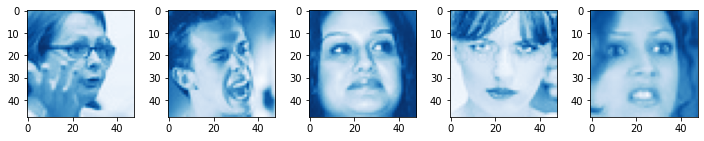

In [13]:
#angry class
plot_images(train_dir+'/angry')

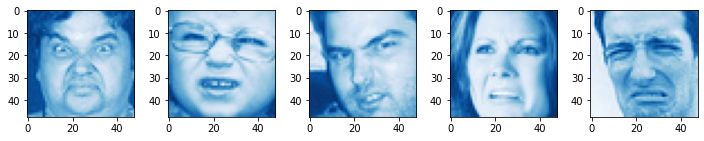

In [14]:
#disgust class
plot_images(train_dir+'/disgust')

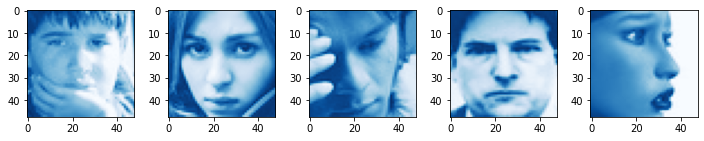

In [15]:
#fear class
plot_images(train_dir+'/fear')

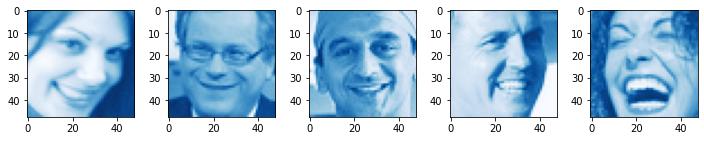

In [16]:
#happy class
plot_images(train_dir+'/happy')

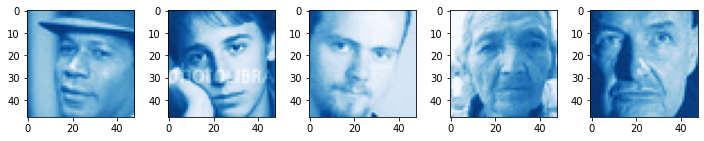

In [17]:
#neutral class
plot_images(train_dir+'/neutral')

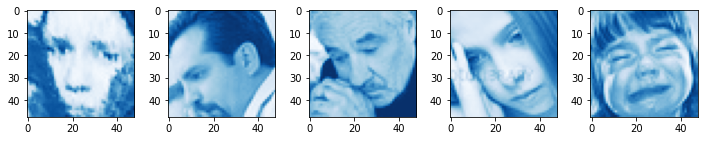

In [18]:
#sad class
plot_images(train_dir+'/sad')

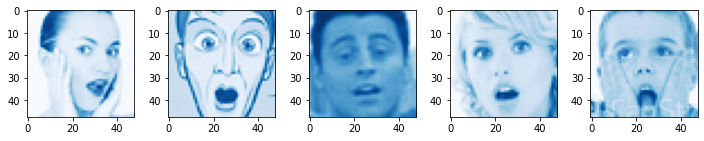

In [19]:
#surprise class
plot_images(train_dir+'/surprise')

## **Data Generators for ResNet**

In [25]:
from keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 32

# selecting colour mode as rgb as resnet is trained on rgb photos and we have grascaled images
datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
train_generator = datagen_train.flow_from_directory(train_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
validation_generator = datagen_train.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 7188 images belonging to 7 classes.
Found 3149 images belonging to 7 classes.


## **Building CNN model with ResNet**